
# Proyecto Cluster DBSCAN
Este proyecto utiliza el algoritmo de clustering DBSCAN para analizar la influencia de variables relacionadas con los hábitos alimenticios en los niveles de obesidad.

## Descripción General del Dataset
Este conjunto de datos incluye información de individuos de México, Perú y Colombia, registrando hábitos alimenticios, condiciones físicas, y algunos antecedentes. Contiene 17 atributos y 2111 registros.

## Descripción de Variables
* `Gender`: Género del individuo (masculino o femenino).
* `Age`: Edad del individuo.
* `Height`: Altura del individuo.
* `Weight`: Peso del individuo.
* `family_history_with_overweight`: Antecedentes familiares de sobrepeso.
* `FAVC`: Frecuencia de consumo de alimentos con alto contenido calórico.
* `FCVC`: Frecuencia de consumo de verduras.
* `NCP`: Número de comidas principales al día.
* `CAEC`: Consumo de comida entre comidas.
* `SMOKE`: Indica si el individuo fuma.
* `CH2O`: Consumo diario de agua.
* `SCC`: Control de calorías (sí o no).
* `FAF`: Frecuencia de actividad física semanal.
* `TUE`: Tiempo de uso de dispositivos electrónicos.
* `CALC`: Frecuencia de consumo de alcohol.
* `MTRANS`: Medio de transporte principal.
* `NObeyesdad`: Nivel de obesidad (variable de clase).

## Objetivo del Análisis
Determinar si variables como el consumo de agua (`CH2O`) y el control de calorías (`SCC`) están relacionadas con los niveles de obesidad. Utilizaremos el algoritmo DBSCAN para identificar grupos de datos similares.


## 1. Importar Librerías Necesarias

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


## 2. Cargar y Explorar el Dataset

In [3]:

# Cargar el dataset
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Información general
data.info()
data.head()

# Descripción estadística
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000



## 3. Selección y Transformación de Variables

Nos enfocaremos en las variables `CH2O`, `SCC`, y `NObeyesdad` para el análisis.


In [4]:

# Filtrar las columnas relevantes
df = data[['CH2O', 'SCC', 'NObeyesdad']]

# Convertir 'SCC' a booleano
df['SCC'] = df['SCC'].map({'yes': True, 'no': False})

# Visualizar las primeras filas para verificar
df.head()


C:\Users\guerr\AppData\Local\Temp\ipykernel_31260\1987433358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCC'] = df['SCC'].map({'yes': True, 'no': False})


,CH2O,SCC,NObeyesdad
0,2.0,False,Normal_Weight
1,3.0,True,Normal_Weight
2,2.0,False,Normal_Weight
3,2.0,False,Overweight_Level_I
4,2.0,False,Overweight_Level_II


## 4. Estandarización de Datos

In [5]:

# Estandarizar las variables numéricas para DBSCAN
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['CH2O']])

# Añadir 'SCC' como variable binaria
df_scaled = np.hstack((df_scaled, df[['SCC']].astype(int).values))

df_scaled[:5]


array([[-0.01307326,  0.        ],
       [ 1.61875854,  1.        ],
       [-0.01307326,  0.        ],
       [-0.01307326,  0.        ],
       [-0.01307326,  0.        ]])

## 5. Aplicar el Algoritmo DBSCAN

In [8]:

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df_scaled)

# Agregar los resultados de clustering al DataFrame original
df['Cluster'] = clusters
df.head()


C:\Users\guerr\AppData\Local\Temp\ipykernel_31260\975537261.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters


,CH2O,SCC,NObeyesdad,Cluster
0,2.0,False,Normal_Weight,0
1,3.0,True,Normal_Weight,1
2,2.0,False,Normal_Weight,0
3,2.0,False,Overweight_Level_I,0
4,2.0,False,Overweight_Level_II,0


## 6. Visualización de Resultados

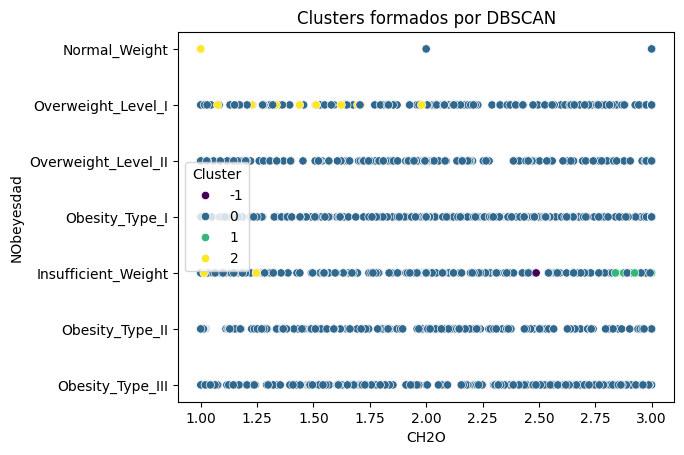

In [12]:

# Visualizar los clusters formados
sns.scatterplot(data=df, x='CH2O', y='NObeyesdad', hue='Cluster', palette='viridis')
plt.title('Clusters formados por DBSCAN')
plt.show()
